In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Fazendo download dos dados
data_google_id = '18H3ODofNbU2LuiLhtDNdKajQaLm6eKPW'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './Dados do sistema.csv', 
                                    showsize = True)

In [ ]:
dados = pd.read_csv("Dados do sistema.csv", sep=";")

In [ ]:
dados.head()

,Cargo selecionado,Idade,Organização,Liderança,Proatividade,Empatia,Respeito,Facilidade com o sist.,Raciocicínio lógico,Competência do func.
0,Desenvolvedor Java,18,3,9,1,10,2,10,6,Bom
1,Analista de projetos jr.,20,8,7,10,10,1,2,10,Ótimo
2,Desenvolvedor Mobile,25,5,3,5,2,0,4,0,Bom
3,Modelador de dados,23,5,3,7,5,5,1,10,Regular
4,Analista financeiro,18,7,10,5,2,0,1,3,Ruim


In [ ]:
dados.shape

(40, 10)

In [ ]:
previsores = dados.iloc[:,0:9].values
classe = dados.iloc[:,9].values

In [ ]:
previsores

array([['Desenvolvedor Java', 18, 3, 9, 1, 10, 2, 10, 6],
       ['Analista de projetos jr.', 20, 8, 7, 10, 10, 1, 2, 10],
       ['Desenvolvedor Mobile', 25, 5, 3, 5, 2, 0, 4, 0],
       ['Modelador de dados', 23, 5, 3, 7, 5, 5, 1, 10],
       ['Analista financeiro', 18, 7, 10, 5, 2, 0, 1, 3],
       ['Auxiliar depto. pessoal', 19, 7, 5, 10, 6, 6, 2, 10],
       ['Analista de contas', 21, 0, 1, 10, 3, 6, 9, 1],
       ['Represent. comercial', 21, 5, 9, 4, 8, 1, 4, 4],
       ['Auxiliar de marketing', 22, 10, 1, 4, 3, 2, 3, 5],
       ['Analista banco de dados', 24, 4, 7, 4, 8, 1, 2, 9],
       ['Front-end', 26, 6, 6, 4, 1, 1, 9, 4],
       ['Projetista de software', 18, 9, 2, 0, 7, 0, 4, 4],
       ['Auxiliar de contas a pagar', 20, 6, 0, 0, 7, 10, 8, 3],
       ['Desenvolvedor Java', 21, 1, 6, 2, 0, 4, 1, 5],
       ['Analista de projetos jr.', 20, 0, 0, 1, 9, 1, 1, 4],
       ['Desenvolvedor Mobile', 19, 9, 5, 9, 9, 1, 5, 7],
       ['Modelador de dados', 23, 5, 8, 3, 3, 1, 2, 4],
 

In [ ]:
classe

array(['Bom', 'Ótimo', 'Bom', 'Regular', 'Ruim', 'Bom', 'Ótimo', 'Bom',
       'Péssimo', 'Ótimo', 'Ruim', 'Bom', 'Bom', 'Ótimo', 'Regular',
       'Regular', 'Bom', 'Ótimo', 'Ruim', 'Péssimo', 'Bom', 'Ótimo',
       'Bom', 'Bom', 'Regular', 'Bom', 'Péssimo', 'Ótimo', 'Ruim', 'Bom',
       'Bom', 'Ótimo', 'Regular', 'Regular', 'Bom', 'Ótimo', 'Ruim',
       'Péssimo', 'Bom', 'Ótimo'], dtype=object)

In [ ]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])

In [ ]:
previsores

array([[7, 18, 3, 9, 1, 10, 2, 10, 6],
       [2, 20, 8, 7, 10, 10, 1, 2, 10],
       [8, 25, 5, 3, 5, 2, 0, 4, 0],
       [10, 23, 5, 3, 7, 5, 5, 1, 10],
       [3, 18, 7, 10, 5, 2, 0, 1, 3],
       [6, 19, 7, 5, 10, 6, 6, 2, 10],
       [1, 21, 0, 1, 10, 3, 6, 9, 1],
       [12, 21, 5, 9, 4, 8, 1, 4, 4],
       [5, 22, 10, 1, 4, 3, 2, 3, 5],
       [0, 24, 4, 7, 4, 8, 1, 2, 9],
       [9, 26, 6, 6, 4, 1, 1, 9, 4],
       [11, 18, 9, 2, 0, 7, 0, 4, 4],
       [4, 20, 6, 0, 0, 7, 10, 8, 3],
       [7, 21, 1, 6, 2, 0, 4, 1, 5],
       [2, 20, 0, 0, 1, 9, 1, 1, 4],
       [8, 19, 9, 5, 9, 9, 1, 5, 7],
       [10, 23, 5, 8, 3, 3, 1, 2, 4],
       [3, 24, 6, 5, 10, 0, 5, 2, 7],
       [6, 21, 10, 8, 9, 2, 0, 5, 0],
       [1, 18, 10, 1, 0, 0, 0, 8, 9],
       [12, 19, 9, 8, 5, 10, 6, 4, 3],
       [5, 25, 5, 8, 3, 6, 8, 4, 8],
       [0, 23, 2, 0, 1, 9, 0, 4, 10],
       [9, 26, 1, 10, 0, 10, 3, 2, 2],
       [11, 22, 2, 2, 10, 9, 8, 9, 6],
       [4, 21, 0, 5, 10, 7, 3, 5, 2],
       [7, 

In [ ]:
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.25,
                                                                  random_state = 42)

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, Y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(141.64615384615385, 205.35999999999999, 'X[8] <= 3.5\ngini = 0.711\nsamples = 30\nvalue = [13, 1, 5, 4, 7]'),
 Text(77.26153846153846, 181.2, 'X[6] <= 8.0\ngini = 0.34\nsamples = 10\nvalue = [8, 0, 0, 1, 1]'),
 Text(51.50769230769231, 157.04, 'X[2] <= 9.5\ngini = 0.198\nsamples = 9\nvalue = [8, 0, 0, 1, 0]'),
 Text(25.753846153846155, 132.88, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0, 0, 0]'),
 Text(77.26153846153846, 132.88, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(103.01538461538462, 157.04, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(206.03076923076924, 181.2, 'X[5] <= 2.5\ngini = 0.76\nsamples = 20\nvalue = [5, 1, 5, 3, 6]'),
 Text(154.52307692307693, 157.04, 'X[5] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [0, 0, 0, 3, 2]'),
 Text(128.76923076923077, 132.88, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2]'),
 Text(180.27692307692308, 132.88, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]'),
 Text(257.53846153846155, 157.04, 'X[1] <= 23.5

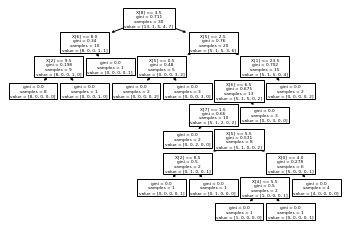

In [ ]:
from sklearn import tree
tree.plot_tree(arvore)

In [ ]:
Y_pred = arvore.predict(X_teste)
Y_pred

array(['Ótimo', 'Ótimo', 'Bom', 'Regular', 'Bom', 'Ótimo', 'Bom', 'Bom',
       'Ótimo', 'Bom'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(Y_teste, Y_pred)

0.1

In [ ]:
confusao = confusion_matrix(Y_teste, Y_pred)
confusao

array([[0, 0, 0, 0, 2],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [2, 0, 0, 0, 1]])

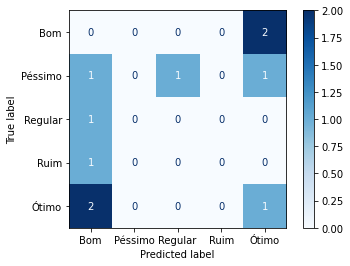

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(arvore, X_teste, Y_teste, cmap='Blues')#, normalize = 'true')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_teste, Y_pred))

              precision    recall  f1-score   support

         Bom       0.00      0.00      0.00         2
     Péssimo       0.00      0.00      0.00         3
     Regular       0.00      0.00      0.00         1
        Ruim       0.00      0.00      0.00         1
       Ótimo       0.25      0.33      0.29         3

    accuracy                           0.10        10
   macro avg       0.05      0.07      0.06        10
weighted avg       0.07      0.10      0.09        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
